In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [3]:
# load data
dir_emu = './'

cosmos = np.loadtxt(os.path.join(dir_emu, 'input.txt'))

lg_k = np.loadtxt(os.path.join(dir_emu, 'lgk.txt'), usecols=(0))
k = 10**lg_k
# z = 0
Ps = np.loadtxt(os.path.join(dir_emu, 'matter_pow_mode_z0.txt'))


In [4]:
Ps.shape

(91, 64)

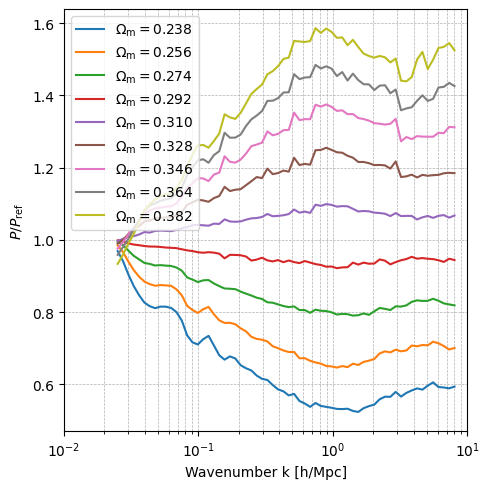

In [5]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# zs_str = ['0', '0.2', '0.5', '1', '2', '3', '4', '9', '49', '99']
# zs_str = ['0','99']

fig, ax = plt.subplots(figsize=(5, 5))

for i in range(9):
    i_cosmo = i + 1 
    ra_P = Ps[i_cosmo]/Ps[0]

    plt.plot(k, ra_P, label=r'$\Omega_\mathrm{m}=%.3f$' % cosmos[i_cosmo][0])
    
# plt.plot(k_com, ra_P, color=colors[j], ls='--')

        
# plt.xlim([1e-3, 10])

xlim1 = 1e-2
xlim2 = 10
plt.xlim(xlim1, xlim2)

plt.xscale('log')
# plt.ylim([.95, 1.05])
plt.xlabel('Wavenumber k [h/Mpc]')
plt.ylabel(r'$P/P_\mathrm{ref}$')
plt.legend()
# plt.title('Linear Matter Power Spectrum')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()
# plt.savefig('matter_power_CLASS_CAMB_ratio_Nncdm3.pdf')
    

In [6]:
def plot_one_param(ax, i, k, Ps, cosmos, num_vary=9, start=1):
    param_names = [r'$\Omega_\mathrm{m}$', r'$\Omega_\mathrm{b}$', r'$h$',r'$A_\mathrm{s}$',r'$n_\mathrm{s}$', r'$w_\mathrm{0}$',r'$w_a$',r'$\sum m_\nu/\mathrm{eV}$',r'$N_\mathrm{eff}$',r'$\alpha_s$',r'$m_\mathrm{WDM}^{-1}$']
    formats = [r'$%.3f$',r'$%.3f$',r'$%.3f$',r'$%.2f$',r'$%.3f$',r'$%.3f$',r'$%.3f$',r'$%.3f$',r'$%.2f$',r'$%.3f$',r'$%.2f$']
    P_ref = Ps[0]
    cosmo_ref = cosmos[0]
    
    
    
    for j in range(num_vary):
        j_cosmo = j + start + i*num_vary 
        ra_P = Ps[j_cosmo]/P_ref

        label = formats[i] % cosmos[j_cosmo][i]
        if param_names[i] == r'$A_\mathrm{s}$':
            label = formats[i] % (cosmos[j_cosmo][i]/1e-9)
        
        ax.plot(k, ra_P, label=label)  # Example plot with varying slope
    ax.set_title(f'{param_names[i]} (reference={cosmo_ref[i]})')  # Adding titles to each subplot
    ax.set_xscale('log')

    ax.axhline(y=1, color='grey', linestyle='--')
    
    # 
    # Custom text to add to the beginning of the legend
    

    if param_names[i] == r'$A_\mathrm{s}$':
        custom_text = r'$A_\mathrm{s}/10^{-9}$'
            # Create a legend handle for the custom text
        # Using a patch as a placeholder for text, setting its alpha to 0 so it's invisible
        custom_handle = mpatches.Patch(color='none', alpha=0)
        
        # Retrieve the current handles and labels
        handles, labels = ax.get_legend_handles_labels()
        
        # Insert the custom text at the beginning of the handles and labels lists
        handles.insert(0, custom_handle)
        labels.insert(0, custom_text)
        
        # Place legend to the right of the subplot, including the custom text at the beginning
        ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    


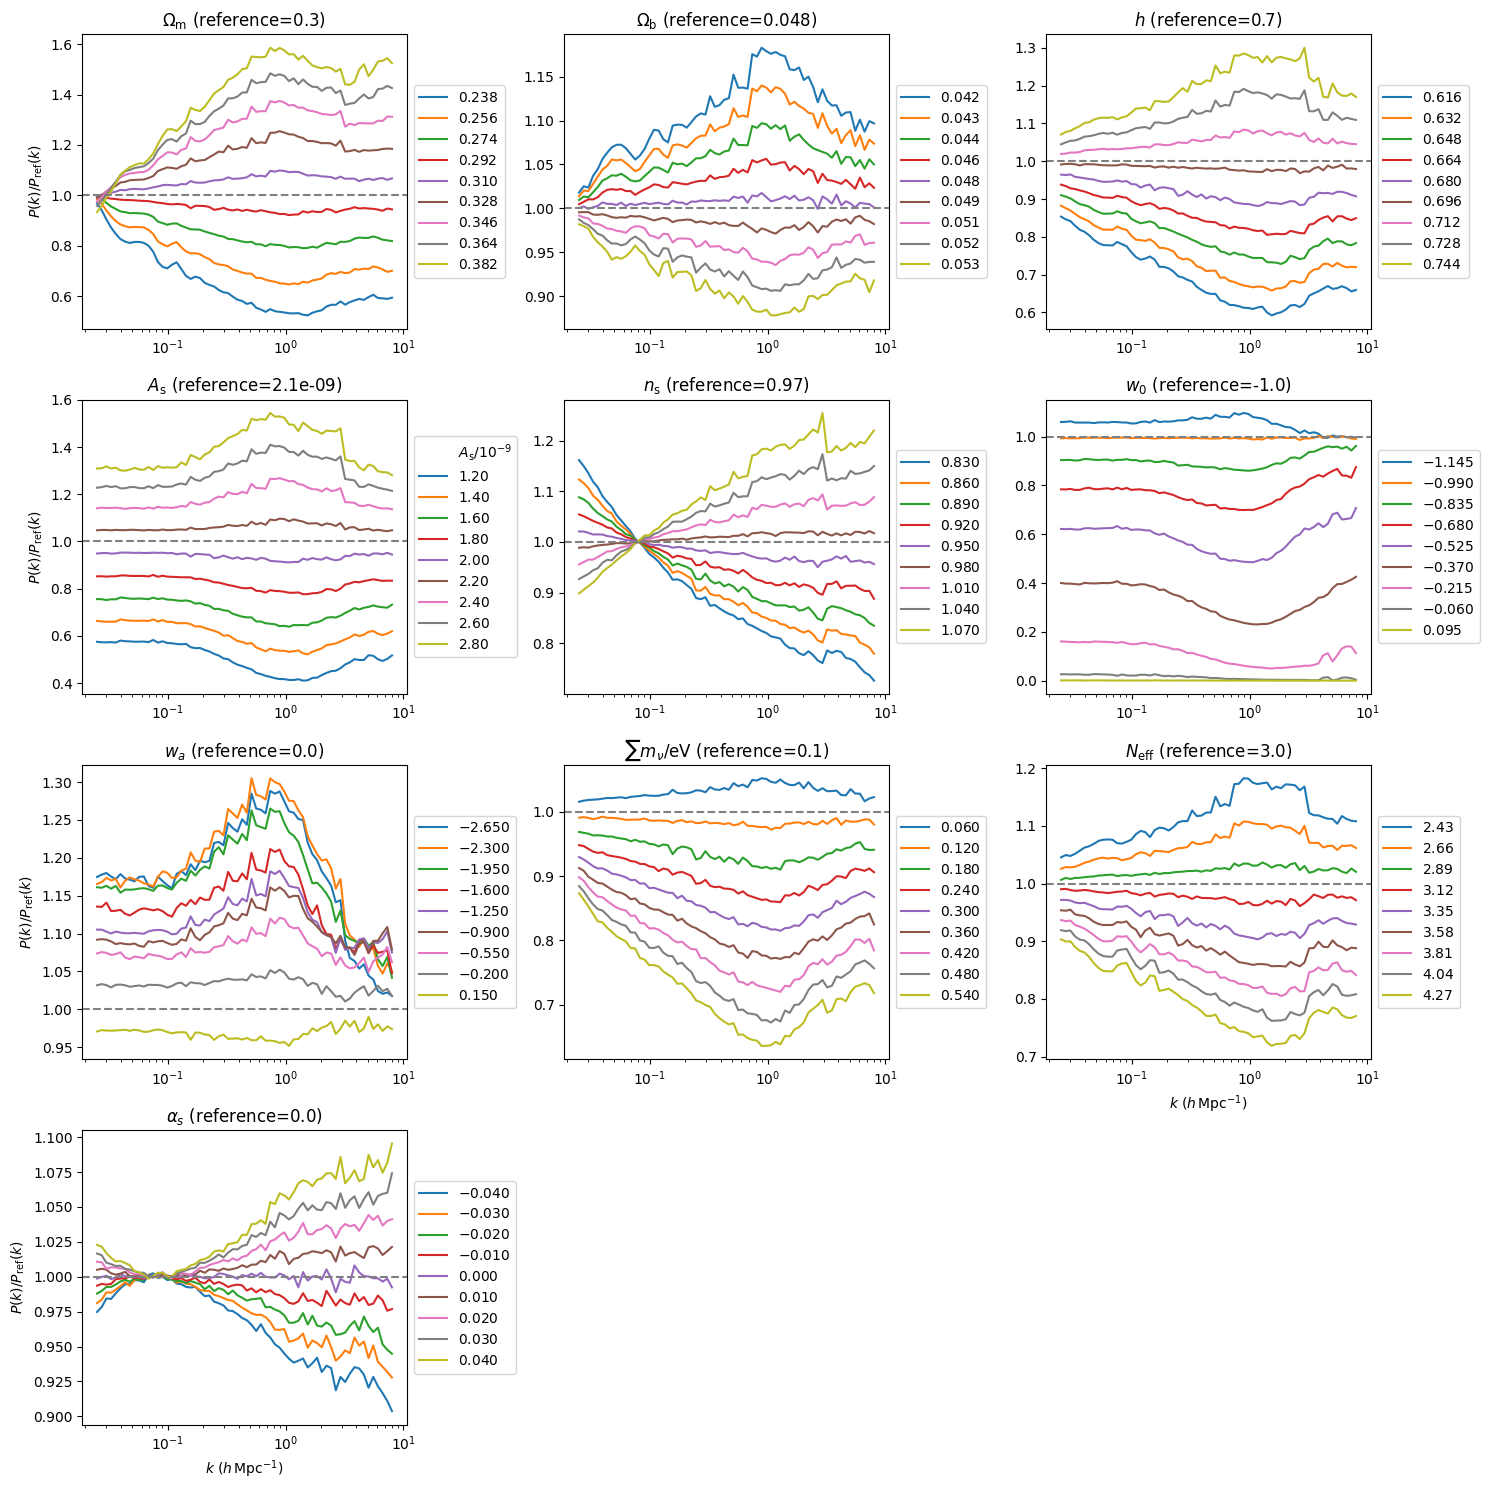

In [8]:


# Create a 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 15))  # Adjusted for a 4x3 grid

# Flatten the array of axes for easier access
axes_list = axs.ravel()

# Iterate over each subplot using the flattened list
for i, ax in enumerate(axes_list):
    if i == 10:
        break
    plot_one_param(ax, i, k, Ps, cosmos, start=1)
    

# Optionally, you can hide the last subplot (12th) if not in use
axes_list[10].axis('off')
axes_list[11].axis('off')

for i in [0,3,6,9]:
    axes_list[i].set_ylabel(r'$P(k)/P_\mathrm{ref}(k)$')

for i in [8,9,10]:
    axes_list[i].set_xlabel(r'$k\ (h\,\mathrm{Mpc}^{-1})$')

plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()  # Display the figure with the subplots
# plt.savefig('emu_varying_values.pdf')
